In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
data = pd.read_csv("./data/processed/train_metadata.csv")

In [3]:
data.head()

id            img  label  \
0  42953  img/42953.png      0   
1  23058  img/23058.png      0   
2  13894  img/13894.png      0   
3  37408  img/37408.png      0   
4  82403  img/82403.png      0   

                                                text  \
0   its their character not their color that matters   
1  don't be afraid to love again everyone is not ...   
2                           putting bows on your pet   
3  i love everything and everybody! except for sq...   
4  everybody loves chocolate chip cookies, even h...   

                              img_path  
0  ./data/raw/HM Dataset/img/42953.png  
1  ./data/raw/HM Dataset/img/23058.png  
2  ./data/raw/HM Dataset/img/13894.png  
3  ./data/raw/HM Dataset/img/37408.png  
4  ./data/raw/HM Dataset/img/82403.png

### Check Null and Data types

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        8500 non-null   int64 
 1   img       8500 non-null   object
 2   label     8500 non-null   int64 
 3   text      8500 non-null   object
 4   img_path  8500 non-null   object
dtypes: int64(2), object(3)
memory usage: 332.2+ KB


### Display summary statistics of this dataset

In [5]:
data.describe()

id        label
count   8500.000000  8500.000000
mean   50006.595765     0.358824
std    28429.195025     0.479684
min     1235.000000     0.000000
25%    25840.000000     0.000000
50%    49834.000000     0.000000
75%    74332.250000     1.000000
max    98764.000000     1.000000

### Display random 10 memes

In [9]:
import random
from PIL import Image

base_dir = "./data/raw/HM Dataset/img"

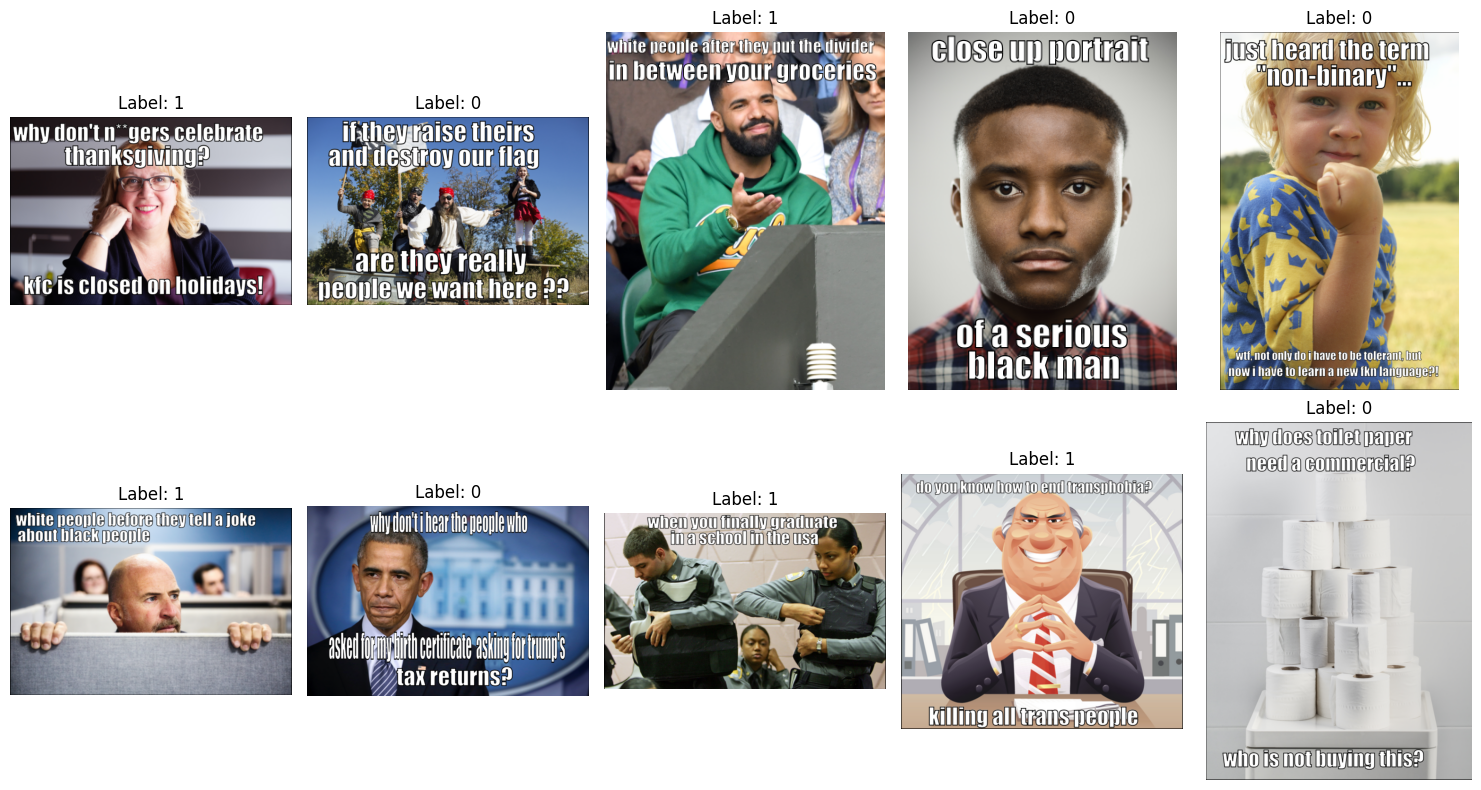

In [10]:
sample_data = data.sample(10, random_state=random.randint(1, 1000))

# Plot 10 random images
plt.figure(figsize=(15, 8))
for i, (_, row) in enumerate(sample_data.iterrows()):
    img_path = os.path.join(base_dir, os.path.basename(row['img']))
    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.subplot(2, 5, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Label: {row['label']}")
    else:
        print(f"Image not found: {img_path}")

plt.tight_layout()
plt.show()

### Lebel Distribution

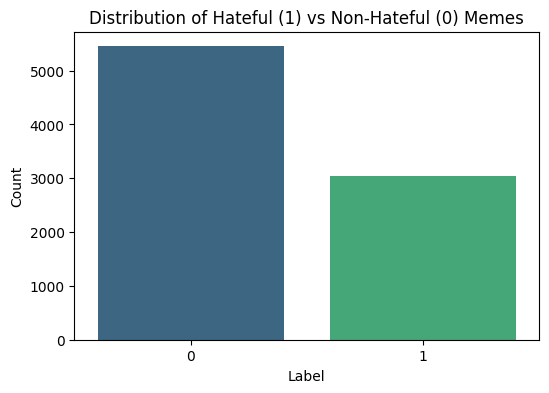

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=data, palette='viridis')
plt.title('Distribution of Hateful (1) vs Non-Hateful (0) Memes')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [12]:
# Calculate percentages
dist = data['label'].value_counts(normalize=True) * 100
print(f"Non-Hateful: {dist[0]:.2f}%")
print(f"Hateful: {dist[1]:.2f}%")

Non-Hateful: 64.12%
Hateful: 35.88%


## Text Length Analysis

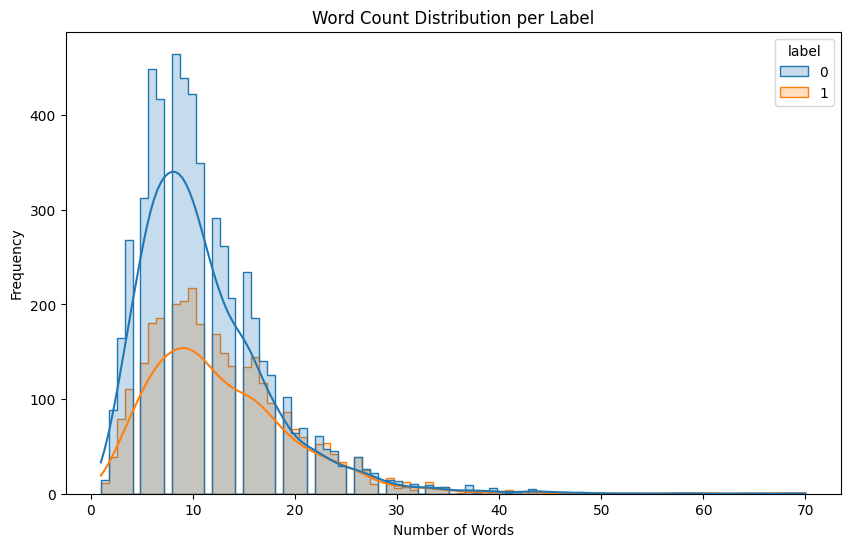

In [13]:
# Create word count column
data['word_count'] = data['text'].apply(lambda x: len(str(x).split()))

# 2. Text Length Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='word_count', hue='label', kde=True, element="step")
plt.title('Word Count Distribution per Label')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

In [14]:
print(f"Average word count: {data['word_count'].mean():.2f}")
print(f"Max word count: {data['word_count'].max()}")

Average word count: 11.74
Max word count: 70


## Visualizing Word Clouds

In [15]:
from wordcloud import WordCloud

def plot_wordcloud(text_data, title):
    wc = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(" ".join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

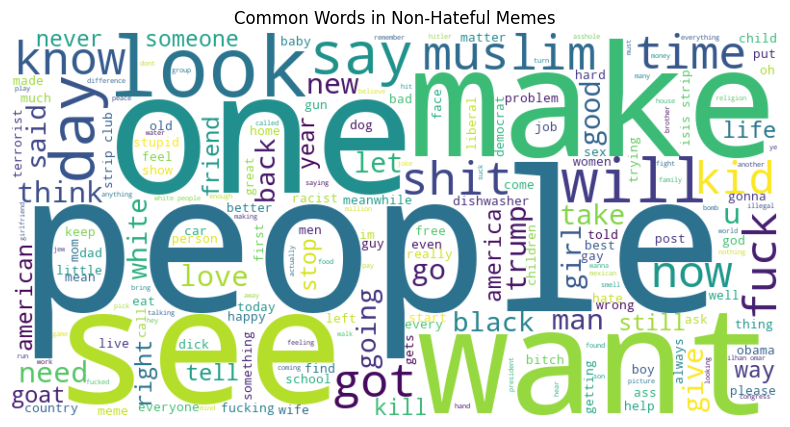

In [16]:
# WordCloud for Non-Hateful (Label 0)
plot_wordcloud(data[data['label']==0]['text'], "Common Words in Non-Hateful Memes")

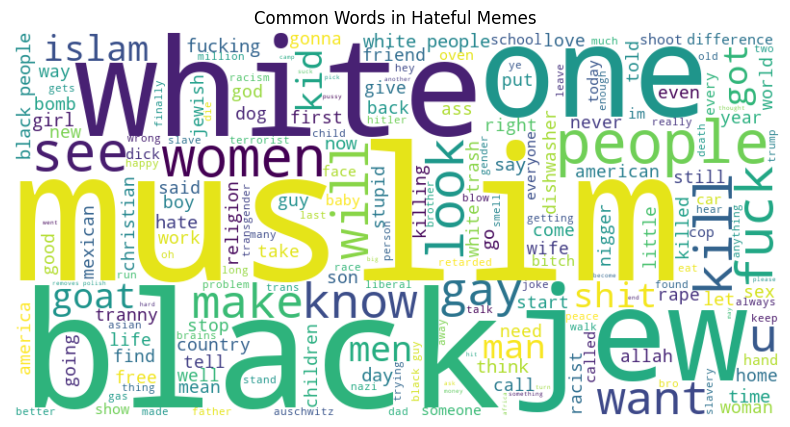

In [17]:
# WordCloud for Hateful (Label 1)
plot_wordcloud(data[data['label']==1]['text'], "Common Words in Hateful Memes")

## Image Exploration & Aspect Ratios

In [18]:
from PIL import Image

# Function to get image dimensions
def get_dims(img_name):
    img_path = os.path.join(base_dir, os.path.basename(img_name))
    if os.path.exists(img_path):
        with Image.open(img_path) as img:
            return img.size
    else:
        return None

In [19]:
# Sample 500 images to check sizes
sample_imgs = data['img'].sample(500, random_state=42)

dims = [get_dims(img) for img in sample_imgs]
dims = [d for d in dims if d is not None]

widths, heights = zip(*dims)

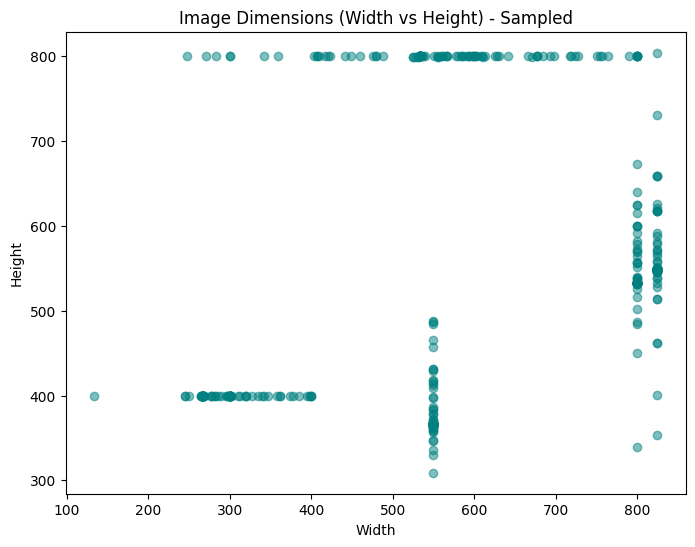

In [20]:
# Dimension Scatter Plot
plt.figure(figsize=(8, 6))
plt.scatter(widths, heights, alpha=0.5, c='teal')
plt.title('Image Dimensions (Width vs Height) - Sampled')
plt.xlabel('Width')
plt.ylabel('Height')
plt.show()

## Visualizing the "Multimodal Gap"

In [21]:
import matplotlib.image as mpimg

def display_samples(df, label, num=3):
    subset = df[df['label'] == label].sample(num, random_state=42)
    plt.figure(figsize=(15, 5))

    for i, (_, row) in enumerate(subset.iterrows()):
        img_path = os.path.join(base_dir, os.path.basename(row['img']))

        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            plt.subplot(1, num, i + 1)
            plt.imshow(img)
            plt.title(
                f"Label: {row['label']}\nText: {row['text'][:50]}...",
                fontsize=10
            )
            plt.axis('off')
        else:
            print(f"Image not found: {img_path}")

    plt.tight_layout()
    plt.show()

Hateful Samples ==>>


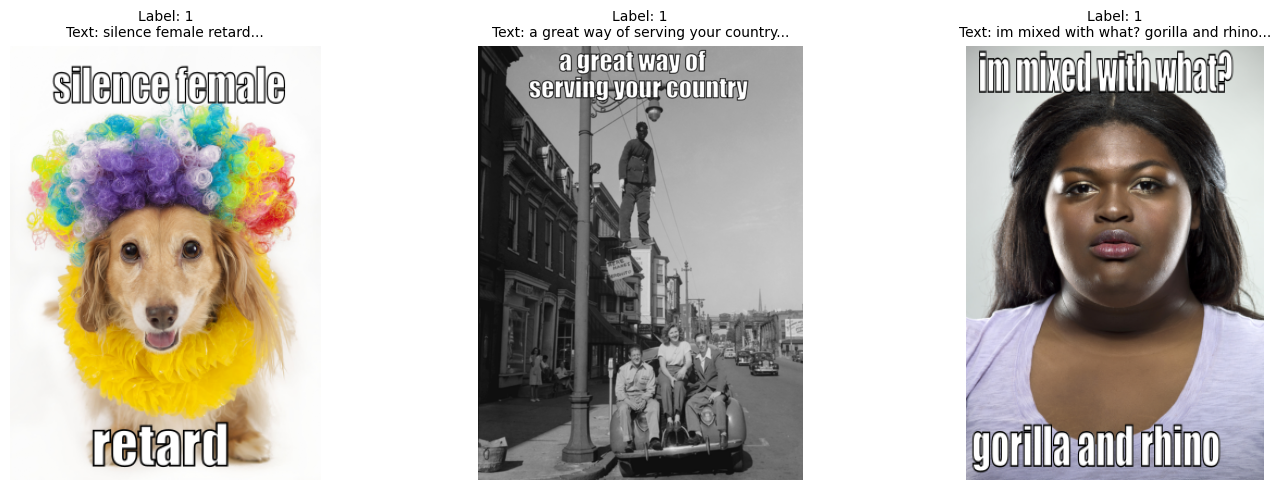

In [22]:
print("Hateful Samples ==>>")
display_samples(data, label=1)

Non-Hateful Samples ==>>


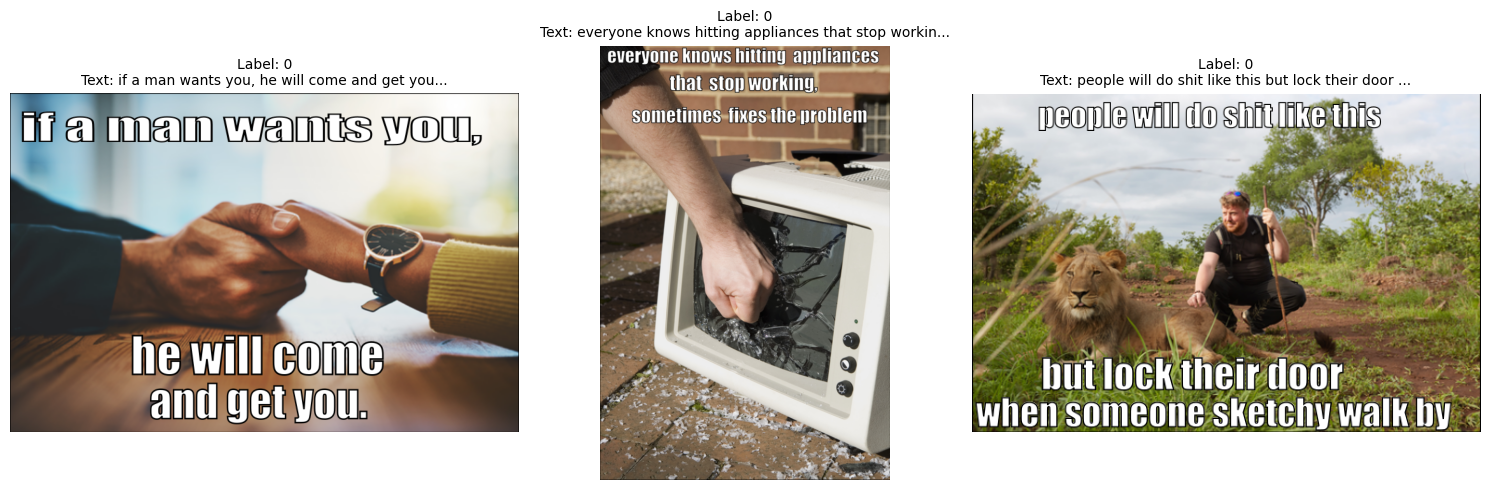

In [23]:
print("Non-Hateful Samples ==>>")
display_samples(data, label=0)